<a href="https://colab.research.google.com/github/2303A52058/Generative-AI/blob/main/Gen_AI_A6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

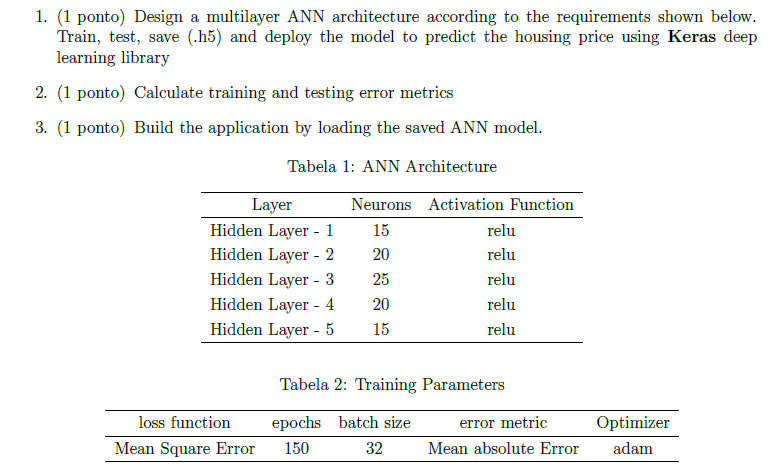

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Load dataset
df = pd.read_csv("Housing.csv")

# One-hot encoding for categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

# Normalize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Dense(15, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Train model
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# Save model
model.save("housing_price_model.h5")

# Load and deploy model
def predict_price(input_data):
    loaded_model = load_model("housing_price_model.h5")
    input_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = loaded_model.predict(input_scaled)
    return prediction[0][0]

# Example usage
example_input = X_test.iloc[0].values
predicted_price = predict_price(example_input)
print(f"Predicted Price: {predicted_price}")


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 24401099620352.0000 - mae: 4625399.0000 - val_loss: 30129988304896.0000 - val_mae: 5007536.0000
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24838362103808.0000 - mae: 4672108.0000 - val_loss: 30129973624832.0000 - val_mae: 5007535.0000
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23771293417472.0000 - mae: 4584833.5000 - val_loss: 30129954750464.0000 - val_mae: 5007532.5000
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24834199257088.0000 - mae: 4695292.5000 - val_loss: 30129910710272.0000 - val_mae: 5007529.0000
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24915078021120.0000 - mae: 4680736.5000 - val_loss: 30129814241280.0000 - val_mae: 5007519.5000
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24925507158016.0000 - mae: 4709395.5000 - val_loss: 30129604526080.0000 - val_mae: 5007499.5000
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24676843651072.0000 -

Train MAE: 721789.4375, Test MAE: 1083199.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Price: 7044943.0
